In [ ]:
#This program generates the rate trace in Fig. 2A and Fig. 2B
#For the spontanous case and FF state.

In [27]:
#Import some libraries 
import numpy as np
import matplotlib.pyplot as plt

In [28]:
#Importing some info I need 
#Number of neurons for each type in each of the 4 layers
N= (np.loadtxt("../general_files/N.txt").reshape(4, 4)).astype(int)
Ntot=5000
#In layer 1: 
N1=int(0.0192574218*Ntot)
#print(N1)

print("The corticular column in this model is composed by layer 2/3,4,5,6 and layer 1")
print("Total number of neurons in the column: %s + %s \n85 perc excitatory and 15 perc inhibitory \nIn each layer: 1 excitotory population and 3 inhibitory populations: pv, sst and vip cells.   "%(Ntot,N1))
print("Number of neurons for each type in each of the 4 layers:")
print(N)
print("The order is from left to right: E, PV, SST, VIP. From top to bottom: 2/3,4,5,6")


The corticular column in this model is composed by layer 2/3,4,5,6 and layer 1
Total number of neurons in the column: 5000 + 96 
85 perc excitatory and 15 perc inhibitory 
In each layer: 1 excitotory population and 3 inhibitory populations: pv, sst and vip cells.   
Number of neurons for each type in each of the 4 layers:
[[1236   65   47  107]
 [1010   98   53   27]
 [ 741   63   56   11]
 [1263  102  102   19]]
The order is from left to right: E, PV, SST, VIP. From top to bottom: 2/3,4,5,6


In [29]:
#File containing the spike data
#a='../simulations_data/In_spontaneuous/Timing/i1/Sp_1' #Spontanous
a='../simulations_data/In_with_e4/Timing/i1/Sp_1' #FF case


#Upload the spikes files, I upload the data from all layers (In case you want to plot it later)
#layer1
S_vip1i=np.array(np.loadtxt(a+'/S_vip1i.txt') )
S_vip1t=np.array(np.loadtxt(a+'/S_vip1t.txt') )*1000

#layer23
S_e23i=np.array(np.loadtxt(a+'/S_e23i.txt') )
S_e23t=np.array(np.loadtxt(a+'/S_e23t.txt') )*1000

S_pv23i=np.array(np.loadtxt(a+'/S_pv23i.txt') )
S_pv23t=np.array(np.loadtxt(a+'/S_pv23t.txt') )*1000

S_sst23i=np.array(np.loadtxt(a+'/S_sst23i.txt') )
S_sst23t=np.array(np.loadtxt(a+'/S_sst23t.txt') )*1000

S_vip23i=np.array(np.loadtxt(a+'/S_vip23i.txt') )
S_vip23t=np.array(np.loadtxt(a+'/S_vip23t.txt') )*1000

#layer4
S_e4i=np.array(np.loadtxt(a+'/S_e4i.txt') )
S_e4t=np.array(np.loadtxt(a+'/S_e4t.txt') )*1000

S_pv4i=np.array(np.loadtxt(a+'/S_pv4i.txt') )
S_pv4t=np.array(np.loadtxt(a+'/S_pv4t.txt') )*1000

S_sst4i=np.array(np.loadtxt(a+'/S_sst4i.txt') )
S_sst4t=np.array(np.loadtxt(a+'/S_sst4t.txt') )*1000

S_vip4i=np.array(np.loadtxt(a+'/S_vip4i.txt') )
S_vip4t=np.array(np.loadtxt(a+'/S_vip4t.txt') )*1000

#layer5
S_e5i=np.array(np.loadtxt(a+'/S_e5i.txt') )
S_e5t=np.array(np.loadtxt(a+'/S_e5t.txt') )*1000

S_pv5i=np.array(np.loadtxt(a+'/S_pv5i.txt') )
S_pv5t=np.array(np.loadtxt(a+'/S_pv5t.txt') )*1000

S_sst5i=np.array(np.loadtxt(a+'/S_sst5i.txt') )
S_sst5t=np.array(np.loadtxt(a+'/S_sst5t.txt') )*1000

S_vip5i=np.array(np.loadtxt(a+'/S_vip5i.txt') )
S_vip5t=np.array(np.loadtxt(a+'/S_vip5t.txt') )*1000

#layer6
S_e6i=np.array(np.loadtxt(a+'/S_e6i.txt') )
S_e6t=np.array(np.loadtxt(a+'/S_e6t.txt') )*1000

S_pv6i=np.array(np.loadtxt(a+'/S_pv6i.txt') )
S_pv6t=np.array(np.loadtxt(a+'/S_pv6t.txt') )*1000

S_sst6i=np.array(np.loadtxt(a+'/S_sst6i.txt') )
S_sst6t=np.array(np.loadtxt(a+'/S_sst6t.txt') )*1000

S_vip6i=np.array(np.loadtxt(a+'/S_vip6i.txt') )
S_vip6t=np.array(np.loadtxt(a+'/S_vip6t.txt') )*1000

In [30]:
#Funciton to compute the rate from the spike data 
def rates(data,iniz,fin,window,step_size):
    spikes=0
    time=iniz*1000
    all_time=fin*1000
    rates=[]
    sort_data=np.sort(data)

    while time <= all_time-window:
        for i in range(0,len(data)):
                if time <sort_data[i]< time+window:
                    spikes+=1
                elif sort_data[i]>= time+window:
                    break
        rates.append((spikes/window)*1000)
        time+=step_size
        spikes=0
    return rates 

In [25]:
#Parameters to compute the rates
iniz=0
fin=3
window=200
step=0.1
step=1

#Compute the rates of PV in layer 5 
r_pv5=rates(S_pv5t,iniz,fin,window,step)
# r_e5=rates(S_e5t,iniz,fin,window,step)
# r_sst5=rates(S_sst5t,iniz,fin,window,step)
# r_vip5=rates(S_vip5t,iniz,fin,window,step)


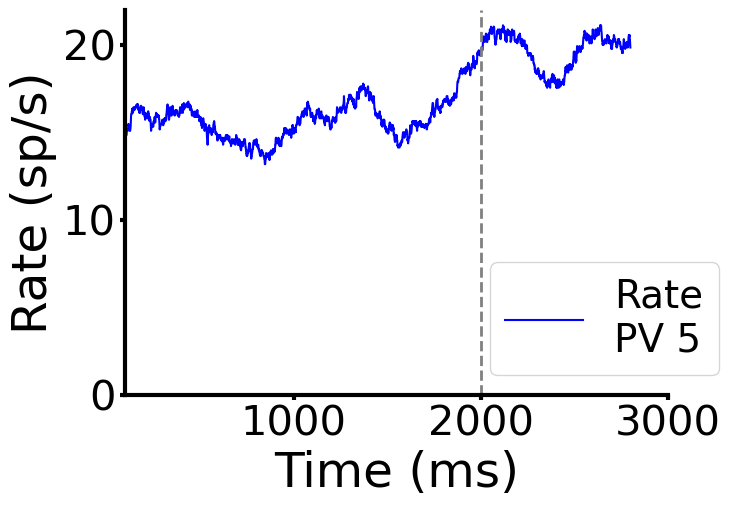

In [31]:
#Rate plot 
fig , ax = plt.subplots(figsize=(7,5))

plt.plot(r_pv5/N[2][1],color='blue', label='Rate\nPV 5')
#plt.plot(r_e5,color='crimson', label='e') #If you also want to plot other groups
# plt.plot(r_sst5,color='green', label='s')
# plt.plot(r_vip5,color='orange', label='v')

#Layout of the plot
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.setp(ax.spines.values(), linewidth=3)

#Labels and size 
plt.xlabel('Time (ms)',size=35)
plt.ylabel('Rate (sp/s)',size=35)
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3)
ax.tick_params(axis="x", labelsize=30)
ax.tick_params(axis="y", labelsize=30)

plt.legend(loc='lower right',bbox_to_anchor=(1.13, 0.),fontsize=28)

plt.locator_params(axis='y', nbins=4)
plt.locator_params(axis='x', nbins=5)
plt.xlim(100,3000)
plt.ylim(0,11) #For Spontanous case
plt.ylim(0,22) #For FF case

#vertical line at stimulus onset
plt.axvline(x=2000, color='grey', linestyle='--', linewidth=2)

#Save figure
#Fig. 2A:
#plt.savefig('../IMAGES/fig2_rate_pv5_spont.png',bbox_inches='tight') 
#Fig. 2B:
plt.savefig('../IMAGES/fig2_rate_pv5_FF.png',bbox_inches='tight')


plt.show()